# Introduction

   This is a data science project using the boston dataset from sklearn to make a price prediction on a house and to determine the features that affect the price. 
    
  ## Steps used: 
   - Loading Data
   - Data cleaning and preprocesing
   - Data visualization
   - Machine Learning

### Importing Libraries
Import libraries needed for operations such as visualization and data munging

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset
Scikitlearn has a lot of datasets and boston dataset is one of them

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

### Information about the data

To use the data we need to get more information about the data.

DESCR is used to get detailed information about a particular datasaet

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Identifying the various column names
feature_names used below is to determine the names of the various columns in the dataset

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

From above we can see that the data is unstructured and very difficult to make meaning out of it.
   
Therefore there is the need to restructure the data to make it more understandable and readable.

It is for this reason that the boston data is converted to a pandas dataframe below.


In [6]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

### Pandas Dataframe
Displaying the first 5 rows of the dataframe created using head()

In [7]:
 df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

As stated earlier this project is to predict the prices of houses but the data is missing the house prices which is the target. 
The house prices is added to the data dataframe

In [8]:
df['MEDV'] = boston.target

The dataframe is displayed to confrim the new column (MEDV)

In [9]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## Data Cleaning 
Data cleaning is done to check the quality of the data

To have a quick overview of the data, the info() method is used

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [0]:
This gives a quick describtion of the data and to show if there are null values or type conflicts

In [11]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Data Visualization
The data is visualized to see any dapendencies and to look at the price distribution

To make a quick overview to see the basic distribution and the distribution of each column

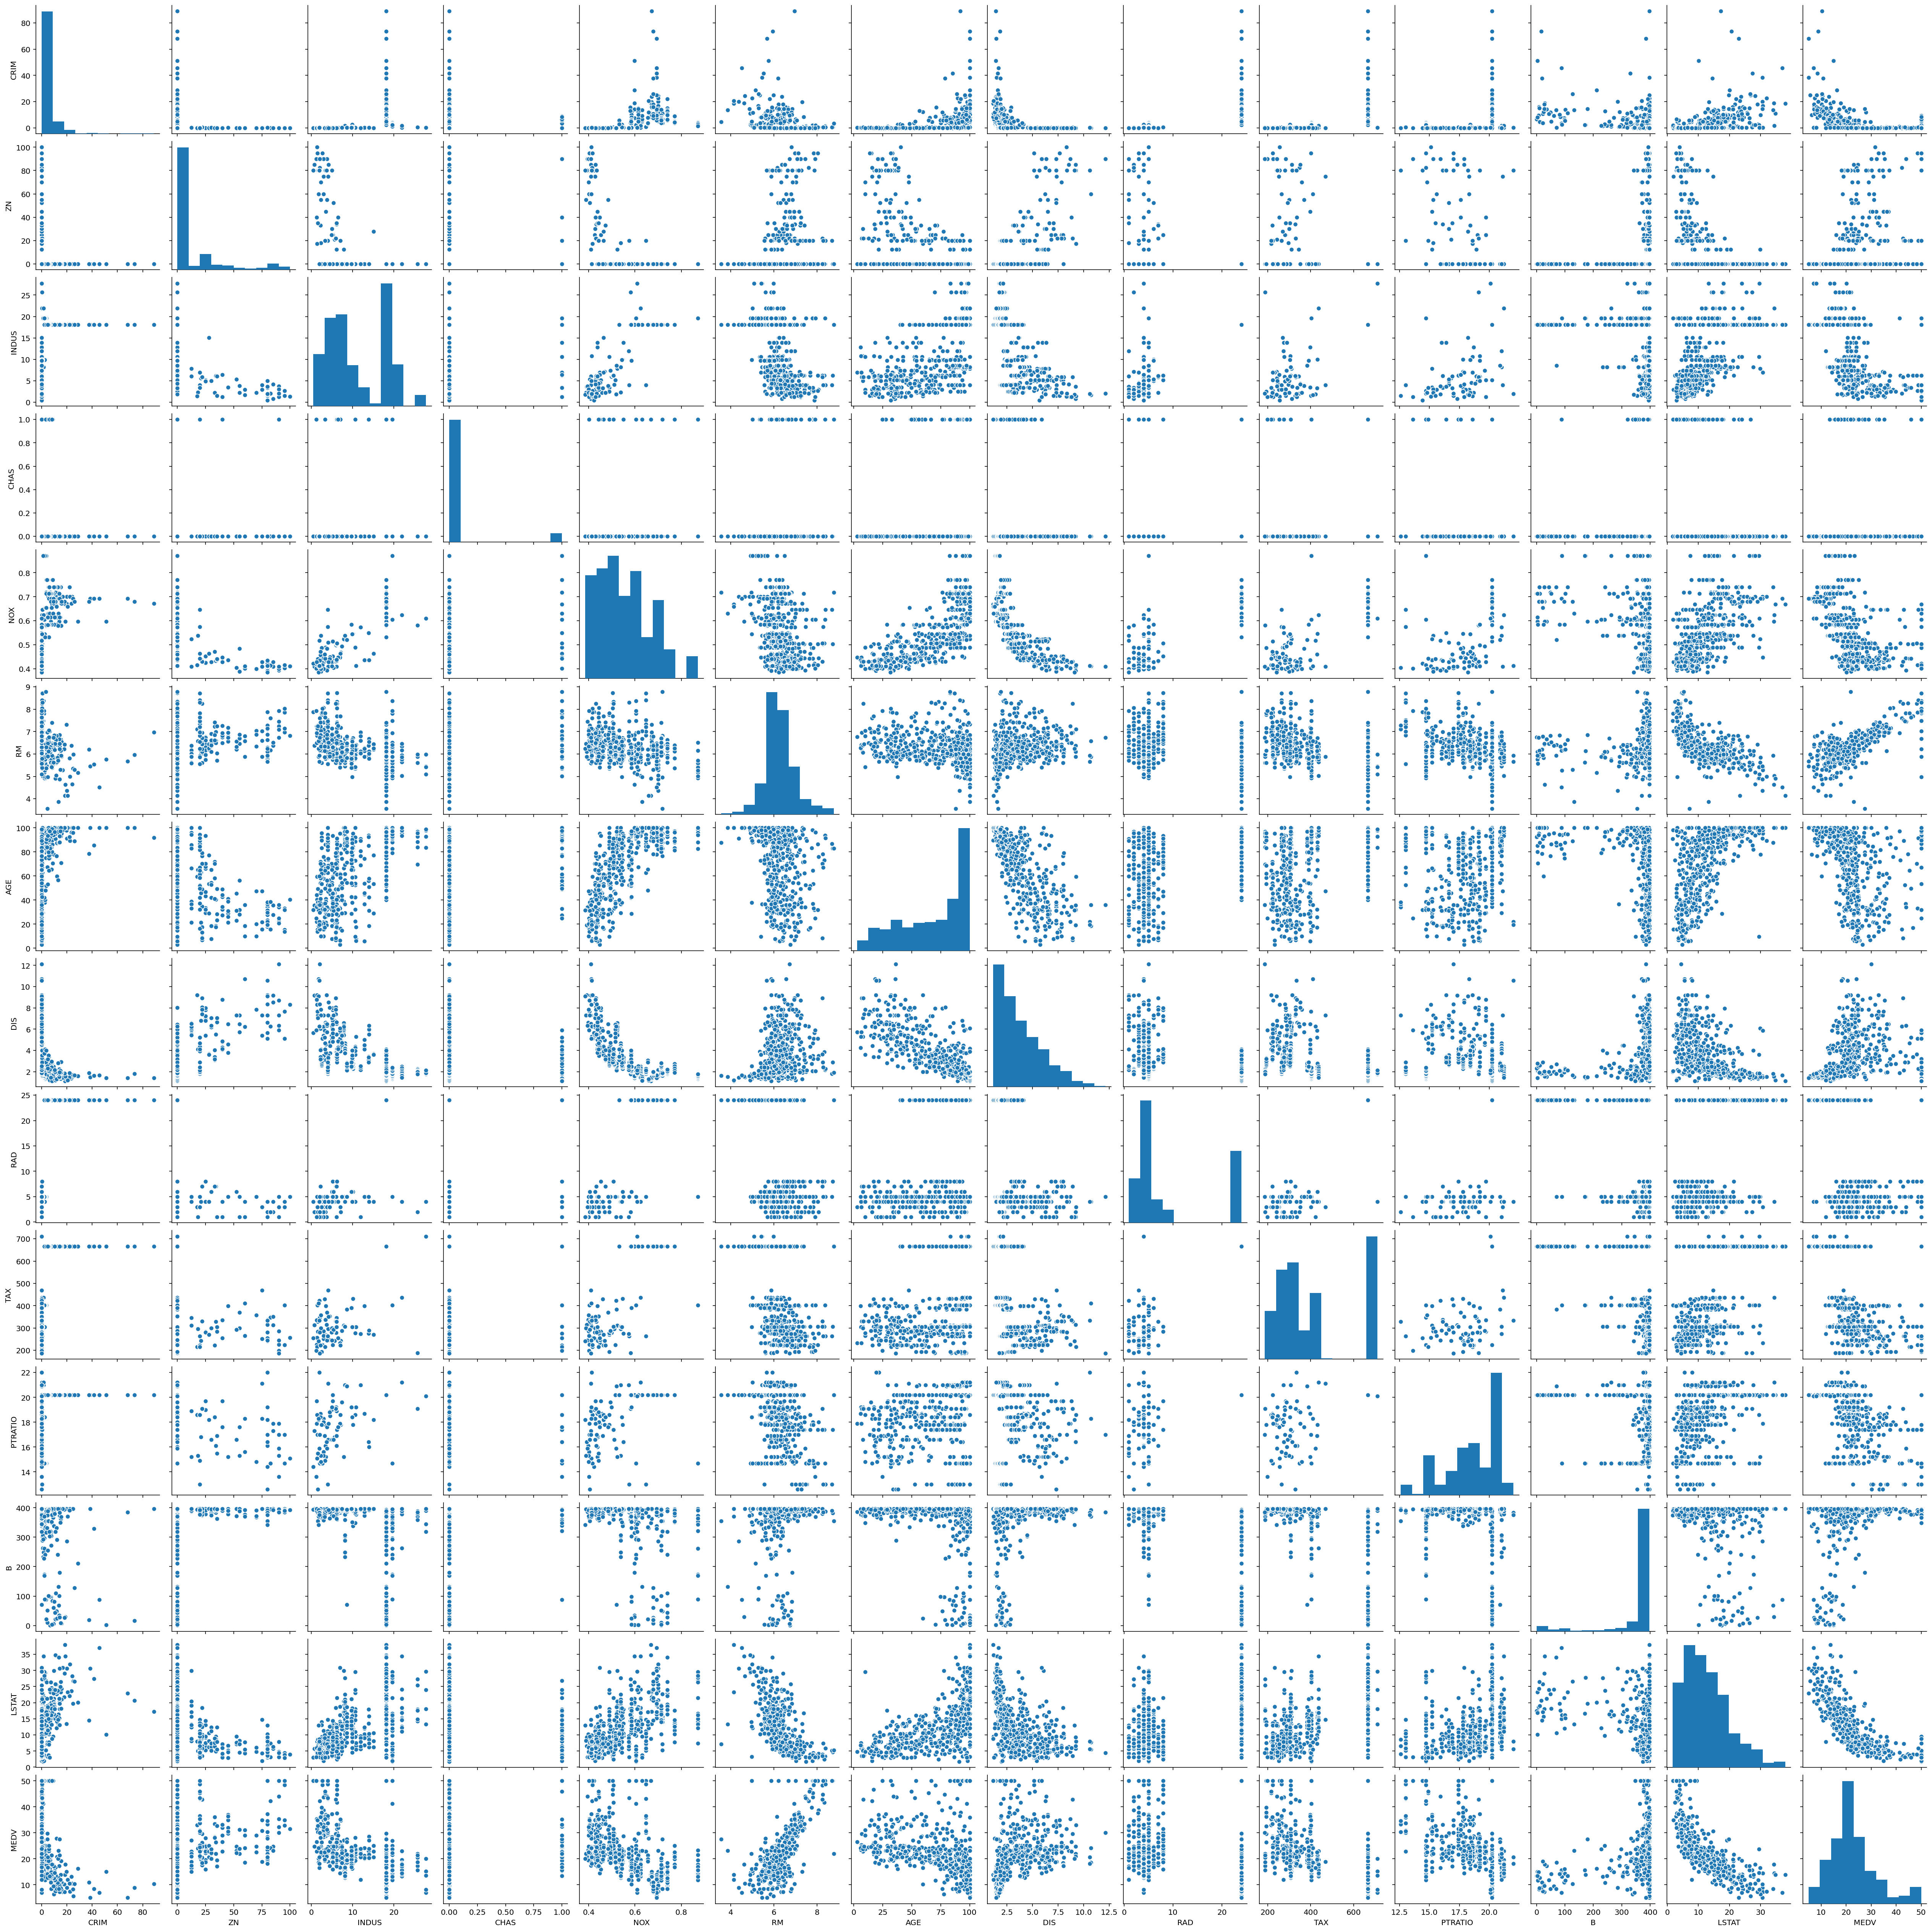

In [12]:
sns.pairplot(df)

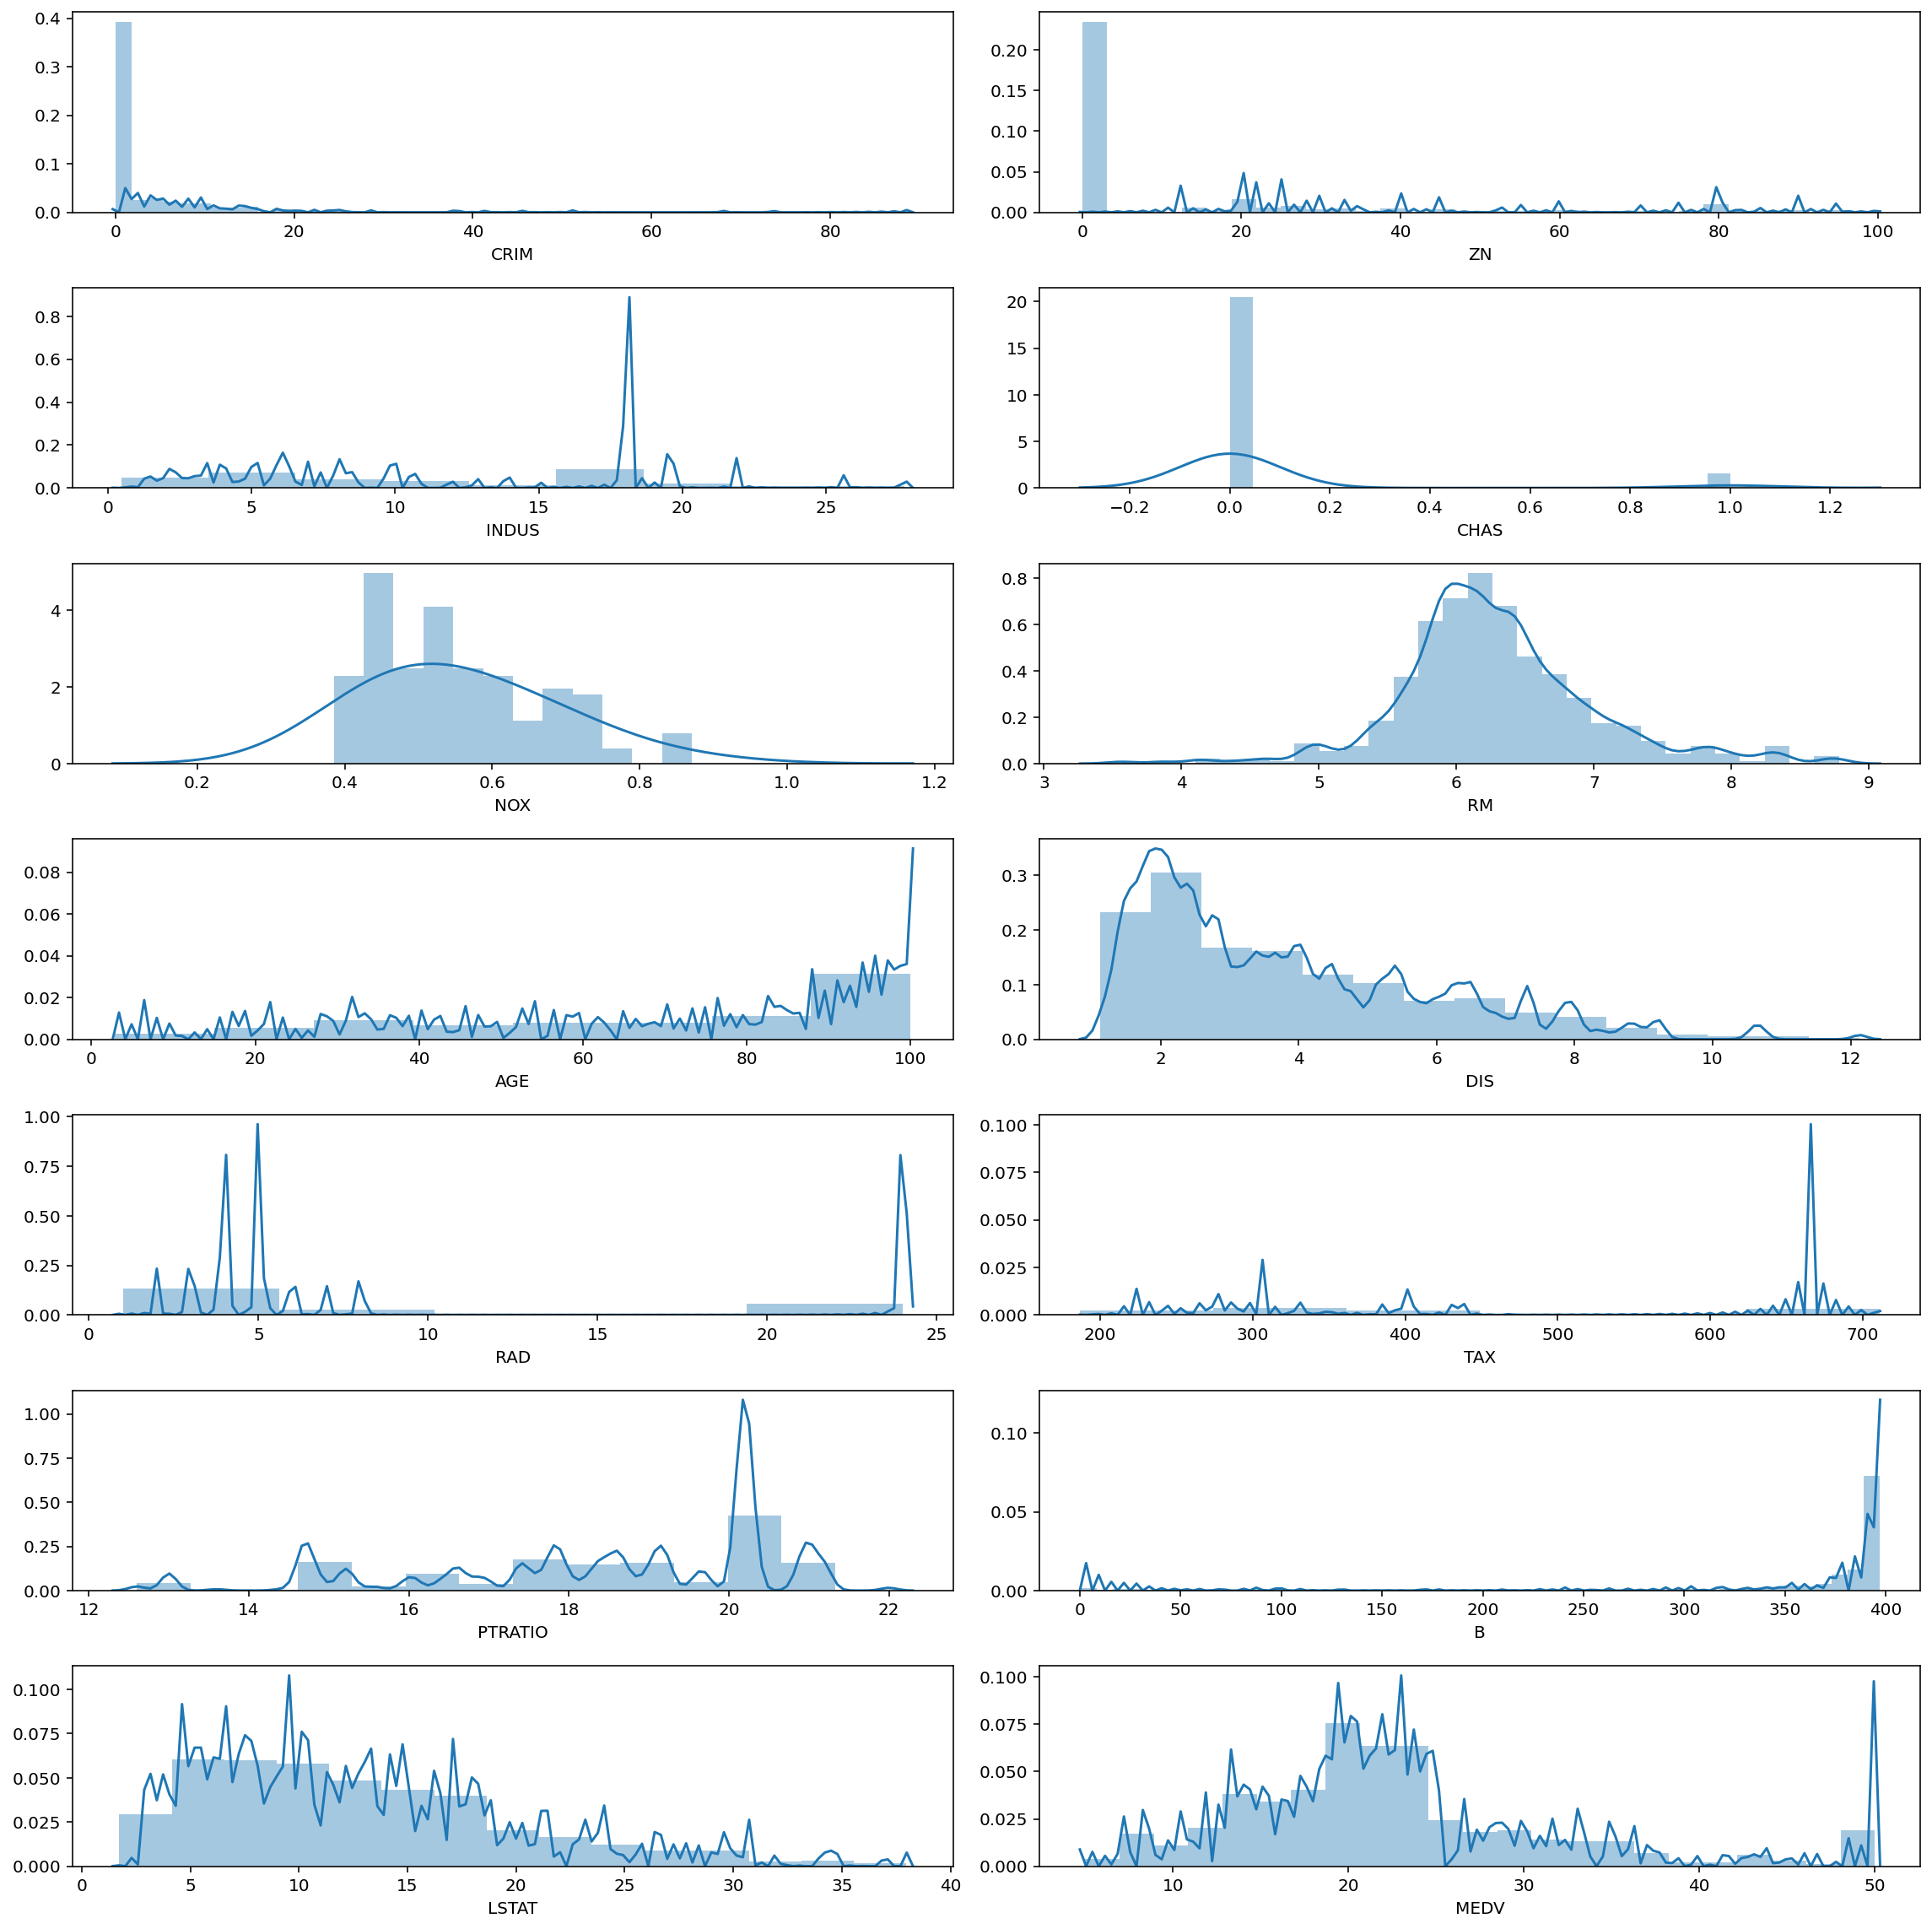

In [13]:
rows = 7
cols = 2
fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,16))
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j], kde_kws=({"bw":0.1}))
        index = index + 1
plt.tight_layout()

Correlation is done next to check the relationship between the variables

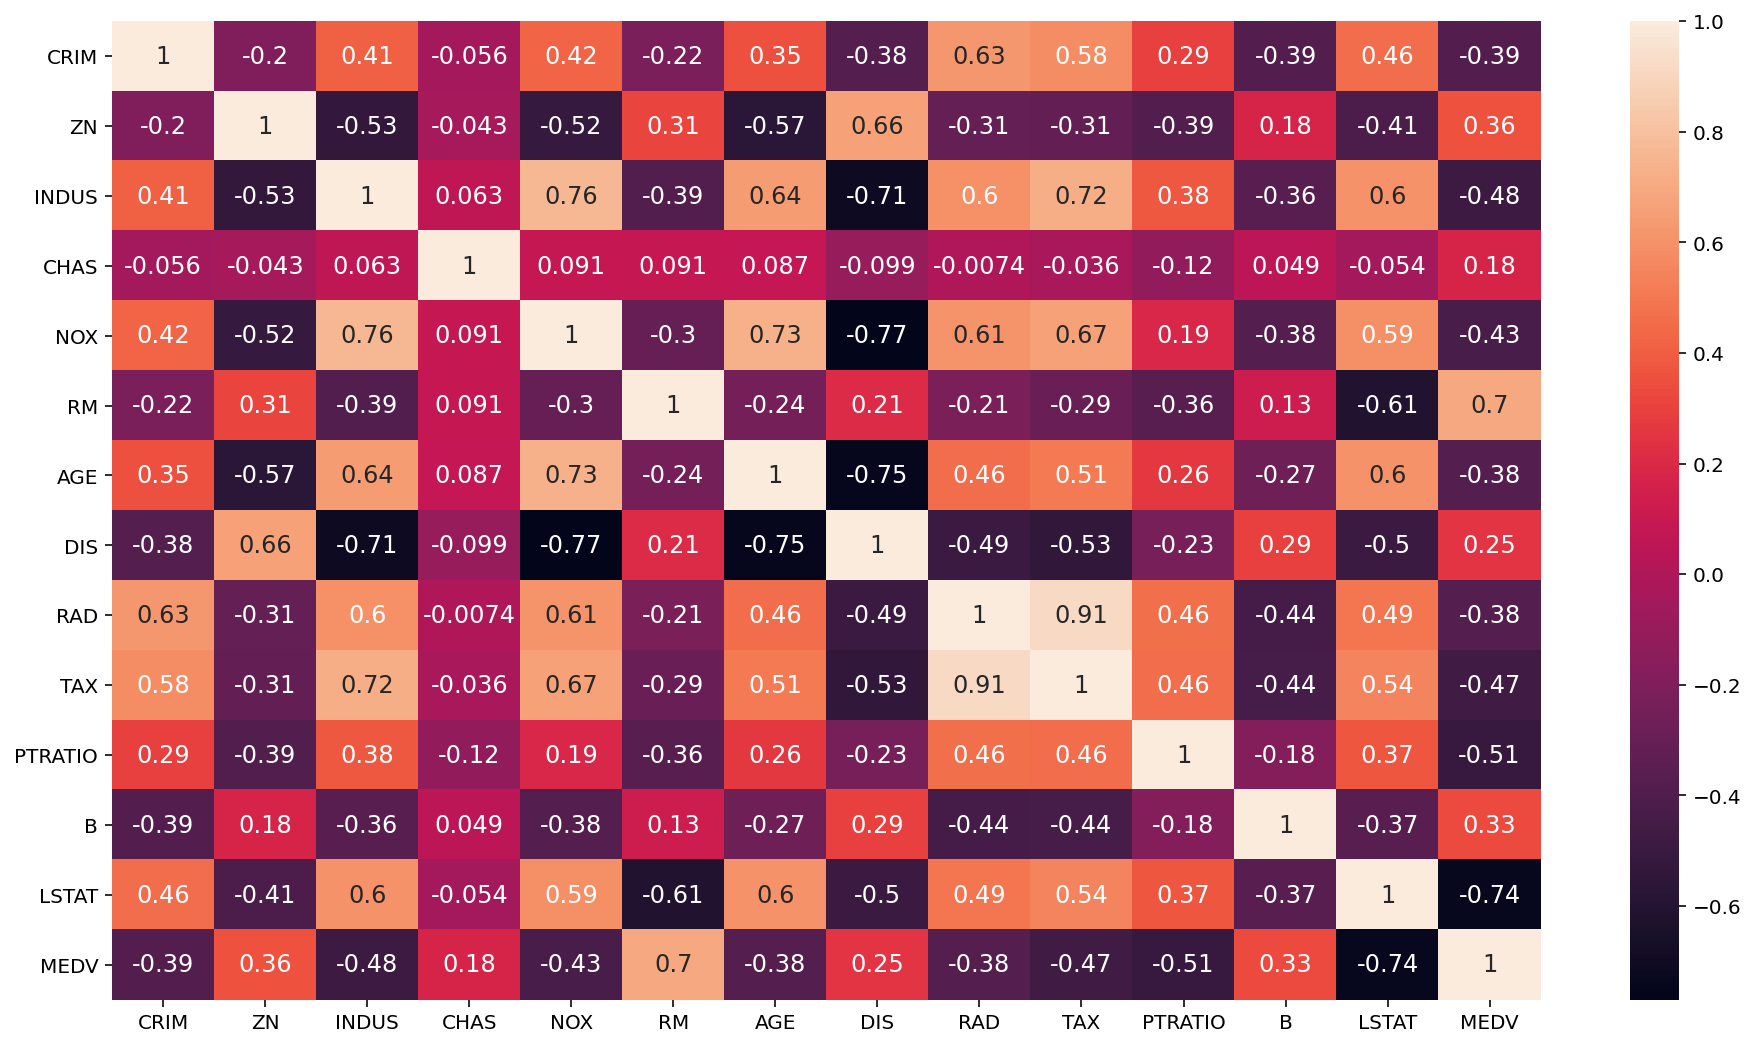

In [14]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.heatmap(df.corr(), annot = True, annot_kws={'size': 12})

Linear regression method will be used and we need nearly high correlations therefore we need to define a thresfold filter.

In [15]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [16]:
threshold = 0.4
corr_value = getCorrelatedFeature(df.corr()['MEDV'], threshold)

In [17]:
corr_value.index.values

array(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype=object)

In [18]:
correlated_data = df[corr_value.index]
correlated_data.head()

INDUS    NOX     RM    TAX  PTRATIO  LSTAT  MEDV
0   2.31  0.538  6.575  296.0     15.3   4.98  24.0
1   7.07  0.469  6.421  242.0     17.8   9.14  21.6
2   7.07  0.469  7.185  242.0     17.8   4.03  34.7
3   2.18  0.458  6.998  222.0     18.7   2.94  33.4
4   2.18  0.458  7.147  222.0     18.7   5.33  36.2

In [19]:
X = correlated_data.drop(labels=['MEDV'], axis = 1)
y = correlated_data['MEDV']

# Machine Learning
Linear regression is going to be used for this project.


The data is split into testing and training dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1)

The training data set is used th train the function using Linear regression

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

 Training the model using fit()

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Making predictions using the testing dataset with the trained model

In [23]:
predictions = lm.predict(X_test)

Visualising the predicted dataset along with the actual dataset to find insights.

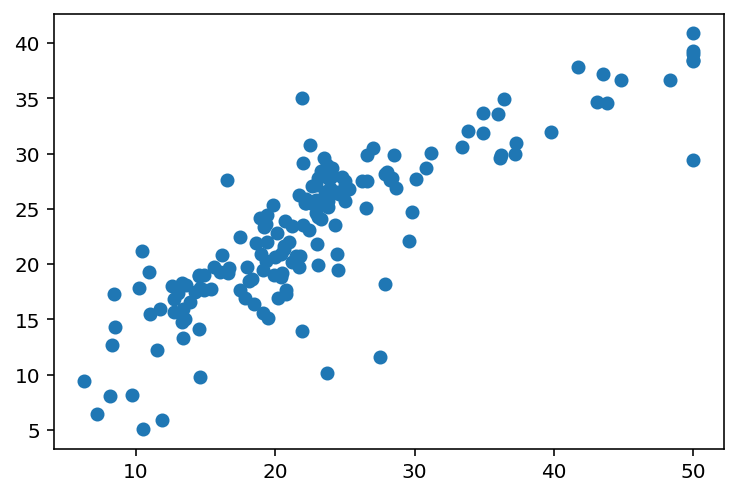

In [24]:
plt.scatter(y_test,predictions)

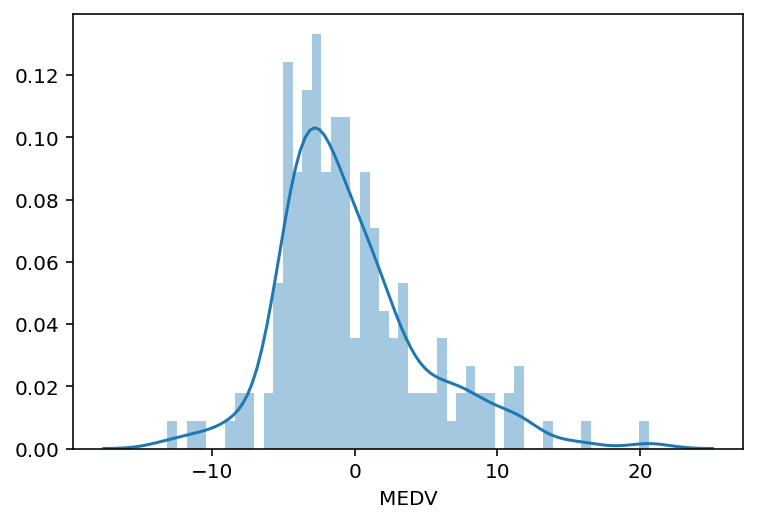

In [25]:
sns.distplot((y_test-predictions),bins=50)

Finding the y intercept

In [26]:
lm.intercept_

23.49923705354543

Finding the coefficient

In [27]:
lm.coef_

array([ 1.08016127e-01, -7.91996313e+00,  4.30011673e+00, -2.02636592e-04,
       -9.66142294e-01, -5.36384366e-01])

Defining the linear regression function

In [28]:
def lin_func(values, coefficients=lm.coef_, y_axis=lm.intercept_):
    return np.dot(values, coefficients) + y_axis


This is used to display the predicted values along with the actual values.

The difference is then computed to find the error between the Predicted and the actual values

In [29]:
from random import randint
for i in range(5):
    index = randint(0,len(df)-1)
    sample = df.iloc[index][corr_value.index.values].drop('MEDV')
    print(
        'PREDICTION: ', round(lin_func(sample),2),
        ' // REAL: ',df.iloc[index]['MEDV'],
        ' // DIFFERENCE: ', round(round(lin_func(sample),2) - df.iloc[index]['MEDV'],2)
    )

PREDICTION:  27.13  // REAL:  22.9  // DIFFERENCE:  4.23
PREDICTION:  5.09  // REAL:  10.5  // DIFFERENCE:  -5.41
PREDICTION:  19.31  // REAL:  10.9  // DIFFERENCE:  8.41
PREDICTION:  29.17  // REAL:  24.3  // DIFFERENCE:  4.87
PREDICTION:  26.29  // REAL:  21.7  // DIFFERENCE:  4.59
